In [1]:
from pathlib import Path 
import pandas as pd 

# Problema de 'lapidario'
## 1. Exploración de datos y limpieza de datos.
### Comenzamos con una exploración de los datos disponibles.

In [2]:
data_1 = pd.read_csv(Path('data', 'coords_diamonds.csv'), index_col= 0, encoding= 'ANSI')
data_2 = pd.read_csv(Path('data', 'diamonds.csv'), index_col= 0, encoding= 'ANSI')

In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    53930 non-null  object 
 1   longitude   53930 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [4]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    50968 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        52840 non-null  float64
 8   y        53345 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


## Observaciones:
* Tenemos 53930 registros de distintos diamantes.
* Existen columnas con valores nulos.
* Nuestra columna objetivo (a predecir) es la de precio ('price').
* Suponemos que la tabla de coordenadas tiene el mismo índice que el de carácteristicas (en caso contrario los datos serían inutilizables). Por lo que combinaremos ambas tablas en una misma tabla.
* La columna latitud no tiene el formato correcto. Debería ser númerica.

## Limpieza de datos
### A continuación analizaremos los datos faltantes y clasificaremos las variables en nominales y númericas.

In [5]:
# Combinamos ambas tablas mediante índices.
data_1['latitude'] = pd.to_numeric(data_1['latitude'], errors = 'coerce')
data = data_1.merge(data_2, left_index= True, right_index=True)

In [6]:
# Clasificamos columnas en nominales y númericas (Nota: el índice es independiente).
col_class = {'longitude': 'num', 'latitude':'num', 'carat':'num', 'cut':'nom', 'color':'nom', 'clarity': 'nom', 'depth':'num', 'table':'num', 'price':'num', 'x':'num', 'y':'num', 'z':'num'}

data

,latitude,longitude,carat,cut,color,clarity,depth,table,price,x,y,z
0,39.881389,-83.093056,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,33.415000,-111.548889,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,40.167222,-105.101389,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,37.371111,-85.583056,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,48.539444,-121.745000,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53925,38.581667,-121.493333,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53926,32.436381,-111.222442,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53927,40.241389,-75.284167,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53928,38.822222,-122.721944,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
# Eliminamos posibles espacios en blancos. Tanto en nombres de columnas como en los valores.
new_names = []
for i,col in enumerate(data.columns):
    # Eliminamos leading and trailing whitespaces en nombres de columnas.
    col = col.strip()
    new_names.append(col)
    # Eliminamos leading and trailing whitespaces en columnas.
    if col_class[col] == 'nom':
        data[col] = data[col].str.strip()
data.columns = new_names

# Analizamos valores nominales únicos.
for col in data.columns:
    if col_class[col] == 'nom':
        print(col, data[col].unique(), '\n')

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Very Goo!d' "P*'remium"
 'I#deal' '#Very Good' 'P?remium' "*'Ideal" '!Good' 'Pre!mium' 'Pr?emium'
 'Very Go#od' 'Ide&al' 'Ide!al' 'Id!eal' '&Premium' 'Go?od' 'G#ood'
 "Very *'Good" "Ide*'al" 'V&ery Good' '&Ideal' 'Very G#ood'] 

color ['E' 'I' 'J' 'H' 'F' 'G' 'D' "*'E" '#F' '&G' '!H' '?J' '#D' '&I' '!I' '?G'
 '#H' '?H' '?E' "*'F" '!E' '&F' '#G' "*'I" '!F' '&E'] 

clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' 'S?I1' 'SI!1' '&VS2'
 '&SI2' "S*'I1" 'VS?1' "S*'I2" '#VS1' 'V&S2' 'V!S2' '!VS2' 'VS#2' "VVS*'2"
 "*'SI2" 'VV?S1' 'S&I1' "*'SI1" 'SI?1' 'VV#S1' 'V#S2' '#SI!1' 'S!I2'] 



### Inicialmente pensamos que existía un error en la codificación de los datos. Después de cargar los datos con codificaciones diferentes sin ver mejores concluímos que los errores ([?, *, ', !, &, #]) no son generados por la codificación. Arreglamos los valores manualmente. 

### Nota: Es posible que las símbolos anteriores no sean errores y representen clasificaciones diferentes. Suponemos que no es el caso.

In [8]:
err_chars = {'?', '*', "'", '!', '&', '#'}
for col in data.columns:
    if col_class[col] == 'nom':
        for char in err_chars:
            data[col] = data[col].str.replace(char, '', regex = False)


In [9]:
# Analizamos valores nominales únicos.
for col in data.columns:
    if col_class[col] == 'nom':
        print(col, data[col].unique(), '\n')

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] 

color ['E' 'I' 'J' 'H' 'F' 'G' 'D'] 

clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'] 



### Ahora tenemos clasificaciones más amigables en las variables nominales. 

## Analisis de variables númericas.

In [10]:
data

,latitude,longitude,carat,cut,color,clarity,depth,table,price,x,y,z
0,39.881389,-83.093056,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,33.415000,-111.548889,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,40.167222,-105.101389,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,37.371111,-85.583056,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,48.539444,-121.745000,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53925,38.581667,-121.493333,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53926,32.436381,-111.222442,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53927,40.241389,-75.284167,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53928,38.822222,-122.721944,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
num_cols = []
for col in data.columns:
    if col_class[col] == 'num':
        num_cols.append(col)

data[num_cols].describe()

,latitude,longitude,carat,depth,table,price,x,y,z
count,53929.000000,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000
mean,38.137444,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141
std,10.485261,39.773132,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909
min,-82.862752,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000
25%,34.147778,-112.073333,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,39.457778,-87.889167,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,42.800556,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,72.700000,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
# Analizamos si existen diamantes con dimensiones (x, y, z) iguales a 0. 
x_0 = data['x'] == 0
y_0 = data['y'] == 0
z_0 = data['z'] == 0

data[x_0 | y_0 | z_0]

,latitude,longitude,carat,cut,color,clarity,depth,table,price,x,y,z
2206,34.904722,-77.231667,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2313,30.294167,-87.573611,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4790,39.535833,-76.348611,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5470,38.873682,-121.133888,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10166,28.509136,34.513634,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11181,42.870833,-85.865000,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11961,41.850000,-87.650000,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13599,39.709390,-113.103304,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15949,43.612222,-116.390556,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24390,28.707778,-96.217222,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


## Observaciones:
* Columnas con datos faltantes [depth, x, y]:
    * depth: Suponemos que representa alguna característica física del diamante. Valores positivos mayores que 0.
    * x,y,z: Suponemos que representan las dimensiones del diamante, encontramos los valores <0 si suponemos que son errores en la entrada de datos, podemos tomar su valor absoluto. Un mayor problema son los diamantes con valores iguales a 0 en estas columnas. Ningun objeto puede tener dimensiones iguales a 0. Estas columnas son candidatas a ser desechadas en caso de comprobarse una correlación pequeña con los valores de precio.
* Valores longitud y latitud. Es dificil imaginarnos porque un diamante tendría valores geográficos. La unica razón por la que creemos que podría incidir en el precio es si representará el origen del diamante. Estas columnas tambien son candidatas a ser eliminadas.



## Analisis de correlación.

### Para generar nuestro analisis de correlación debemos antes debemos de corregir los valores no disponibles. De igual manera, debemos corregir los datos inchoerentes (dimensiones iguales a 0). Por el momento desechamos estos datos.

In [13]:
# Convertimos a positivos valores negativos en dimensiones.
dims = ['x','y','z']
data[dims] = abs(data[dims])

# Retiramos dimensiones iguales a 0.
data_aux = data[~(x_0 | y_0	| z_0)]
data_aux = data_aux.dropna()

# Generamos el analisis de correlaciones de cada variable con el precio.
correlations = data_aux.corr()
correlations['price'].sort_values(ascending = False)




price        1.000000
carat        0.921450
x            0.886998
y            0.871137
z            0.867325
table        0.127237
longitude    0.003329
latitude    -0.005712
depth       -0.009885
Name: price, dtype: float64

In [14]:
len(data_aux)/len(data)

0.9446875579454849

### Observamos que los carates y las dimensiones son fundamentales para determinar el precio.
### Adicionalmente, si descartamos las filas con datos no disponibles nos quedamos con el 94.47% de las filas. Consideramos que es mejor desechar estas columnas ya que no afectamos significativamente el tamaño de nuestro conjunto de datos.
### La latidud y longitud no nos convence como determinante en el precio. Tiramos las columnas. La profundidad aparantemente no influye sin embargo la dejamos con la esperanza de que nuestro regresor pueda encontrar alguna relación oculta.

In [15]:
data = data_aux
data.drop(['longitude', 'latitude'], axis = 1, inplace = True)

## Transformación de variables independientes. 
### A continuación escalamos nuestras variables númericas y codificamos las variables categóricas. Nota: XGBoost tiene una arquitectura similar a los RandomForest y como estos no es necesario hacer un escalamiento de variables. De cualquier manera realizamos el escalamiento.

In [16]:
nom_cols = []
num_cols = []
for col in data.columns:
    if col_class[col] == 'num':
        num_cols.append(col)
    else:
        nom_cols.append(col)

# Generamos df con variables categóricas codificadas.
t_data = pd.get_dummies(data, prefix = nom_cols, prefix_sep= '_')

In [17]:
def normalize(x: pd.Series):
    return (x - x.min())/(x.max() - x.min())

# Normalizamos columnas númericas
for col in num_cols:
    if col != 'price':
        t_data[col] = normalize(t_data[col])

t_data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,326,0.031384,0.004892,0.044256,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.002079,0.466667,0.346154,326,0.022825,0.002355,0.040351,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.006237,0.386111,0.423077,327,0.045649,0.006523,0.040351,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.018711,0.538889,0.288462,334,0.067047,0.009422,0.050765,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.022869,0.563889,0.288462,335,0.087019,0.011596,0.054670,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53924,0.108108,0.547222,0.307692,2757,0.279601,0.036601,0.081679,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53925,0.108108,0.494444,0.269231,2757,0.288160,0.037144,0.079076,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53926,0.108108,0.558333,0.230769,2757,0.279601,0.036963,0.082655,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53927,0.103950,0.550000,0.326923,2757,0.275321,0.035695,0.081028,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
x_cols = list(t_data.columns)
x_cols.remove('price')
x = t_data[x_cols]
y = t_data['price']
x

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,0.031384,0.004892,0.044256,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.002079,0.466667,0.346154,0.022825,0.002355,0.040351,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.006237,0.386111,0.423077,0.045649,0.006523,0.040351,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.018711,0.538889,0.288462,0.067047,0.009422,0.050765,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.022869,0.563889,0.288462,0.087019,0.011596,0.054670,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53924,0.108108,0.547222,0.307692,0.279601,0.036601,0.081679,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53925,0.108108,0.494444,0.269231,0.288160,0.037144,0.079076,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53926,0.108108,0.558333,0.230769,0.279601,0.036963,0.082655,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53927,0.103950,0.550000,0.326923,0.275321,0.035695,0.081028,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Analisis de variable dependiente
### Ahora observamos la distribución de la variable precio. En caso de tener una distribución muy sesgada aplicaremos una transformación 'Box-Cox' en un intento de normalizarla.


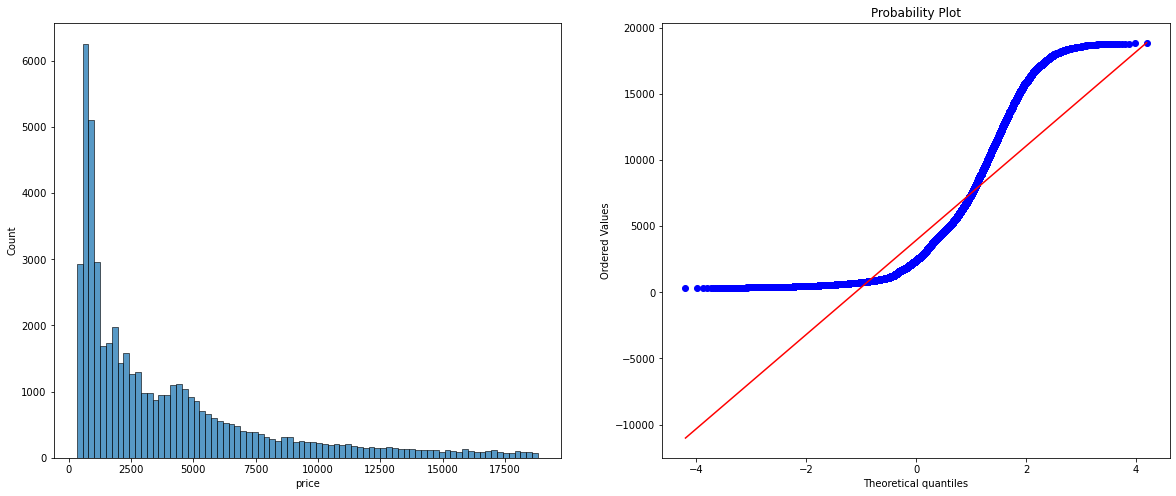

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
fig, axes = plt.subplots(1,2, figsize = (20, 8))

# Histograma
sns.histplot(ax = axes[0], data = y)
# Gráfica de ajuste a la distribución normal.
axes[1] = stats.probplot(y, plot = sns.mpl.pyplot)

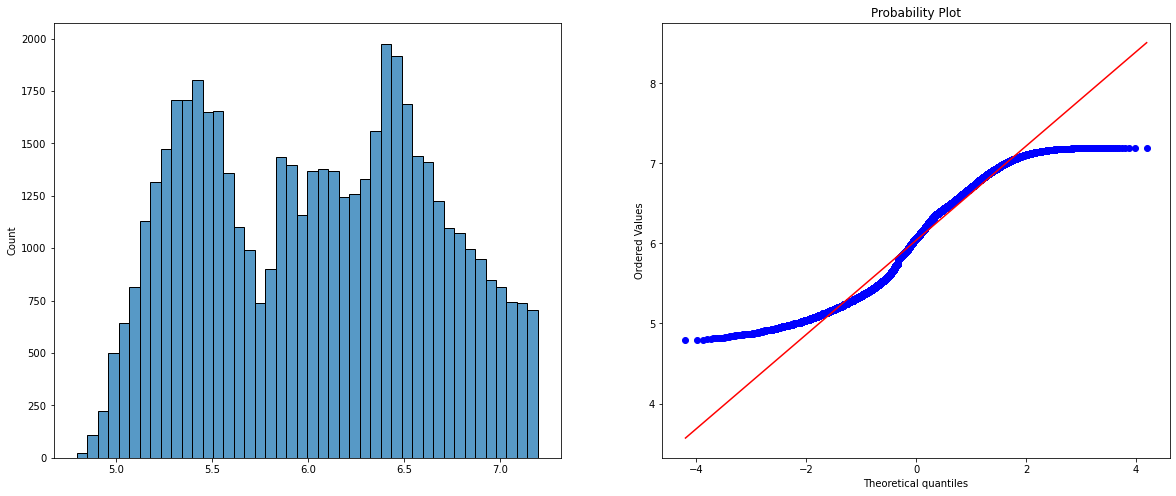

In [20]:
y_hat, transf = stats.boxcox(y)
fig, axes = plt.subplots(1,2, figsize = (20, 8))

# Histograma
sns.histplot(ax = axes[0], data = y_hat)
# 
axes[1] = stats.probplot(y_hat, plot = sns.mpl.pyplot)

### Nos gusta más esto.

## Modelado 
### A conntinuación seleccionamos y entrenamos un modelo para predecir el precio de los diamantes basandose en sus características.
### Por experiencia utlizaremos el modelo XGBOOST, este modelo es preciso, flexible y rapido de implementar. 
### Entrenaremos y evaluaremos el desempeño del modelo utizando el algoritmo de validación cruzada K-Folds (k = 5). Utlizaremos la métrica MSE (error medio cuadrado).

## Modelado inicial.

In [21]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Entrenamos y evaluamos nuestro modelo.
scores = cross_val_score(XGBRegressor(), x, y_hat, scoring = 'neg_mean_squared_error')

In [22]:
print(f'"Raíz del error cuadrado medio (promedio sobre los 5 cortes): {((-scores)**(1/2)).mean():.2f}')
print(pd.Series(y_hat).describe())

"Raíz del error cuadrado medio (promedio sobre los 5 cortes): 0.11
count    50947.000000
mean         6.038956
std          0.599689
min          4.792861
25%          5.490201
50%          6.057898
75%          6.516529
max          7.197011
dtype: float64


### Tardamos ~7 segundos en realizar los 4 entrenamientos del modelo. Ahora haremos una busqueda aleatoria de mejores hiperparametros. Estoy dispuesto a esperar ~5 minutos, haremos por lo tanto 50 iteraciones.
###

In [23]:
# Nota: los siguientes rangos parametrales no son de mi autoría pues desconozco los rangos recomendados.
# Definimos los rangos de nuestros parametros a optimizar.

import numpy as np
parameters = { 'max_depth': [3, 5, 6, 10, 15, 20],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'subsample': np.arange(0.5, 1.0, 0.1),
'colsample_bytree': np.arange(0.4, 1.0, 0.1),
'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
'n_estimators': [100, 500, 1000]}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
## Iniciamos optimización aleatoria.
model = XGBRegressor()
rand_search = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'neg_mean_squared_error', n_iter = 20, verbose = 1)
rand_search.fit(x, y_hat)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=20,
                   param_distributions={'colsample_by

In [25]:

print(f'Mejores parametros: {rand_search.best_params_}')
print(f'RMSE: {(-rand_search.best_score_)**(1/2):.4f}')

Mejores parametros: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.4}
RMSE: 0.0911


### Ahora seleccionamos nuestro mejor modelo y obtenemos las predicciones.

In [26]:
model = rand_search.best_estimator_
# Predicciones:
y_pred = model.predict(x)

In [27]:
from scipy.special import inv_boxcox
# Ahora invertimos nuestra transformación box-cox
y_final_predictions = pd.Series(inv_boxcox(y_pred, transf))


In [28]:
se = (y_final_predictions - y)**2
ae = abs(y_final_predictions - y)
print(f'Real MSE: {se.mean()}')
print(f'Real MAE: {ae.mean()}')


Real MSE: 12619939.33824373
Real MAE: 1441.9322232751433


count    48147.000000
mean      1441.932223
std       3246.689042
min          0.013428
25%        121.443573
50%        318.286011
75%        903.606201
max      18281.672028
dtype: float64


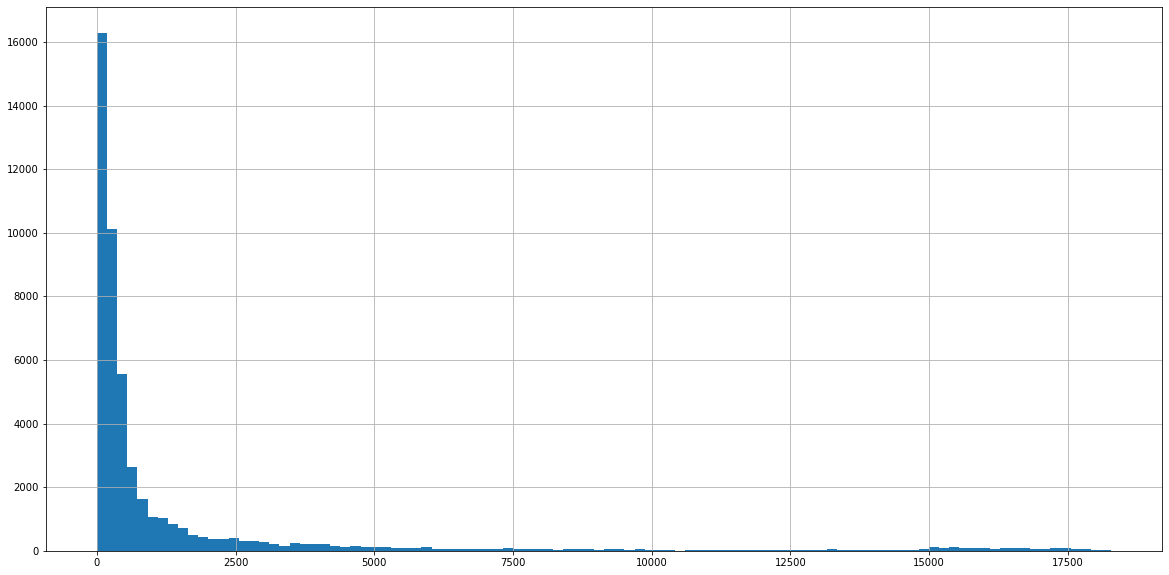

In [29]:
# Graficamos histograma de errores absolutos.
ae.hist(bins = 100, figsize= (20,10))
print(ae.describe())

count    4.814700e+04
mean     1.261994e+07
std      4.916906e+07
min      1.803041e-04
25%      1.474854e+04
50%      1.013060e+05
75%      8.165042e+05
max      3.342195e+08
dtype: float64


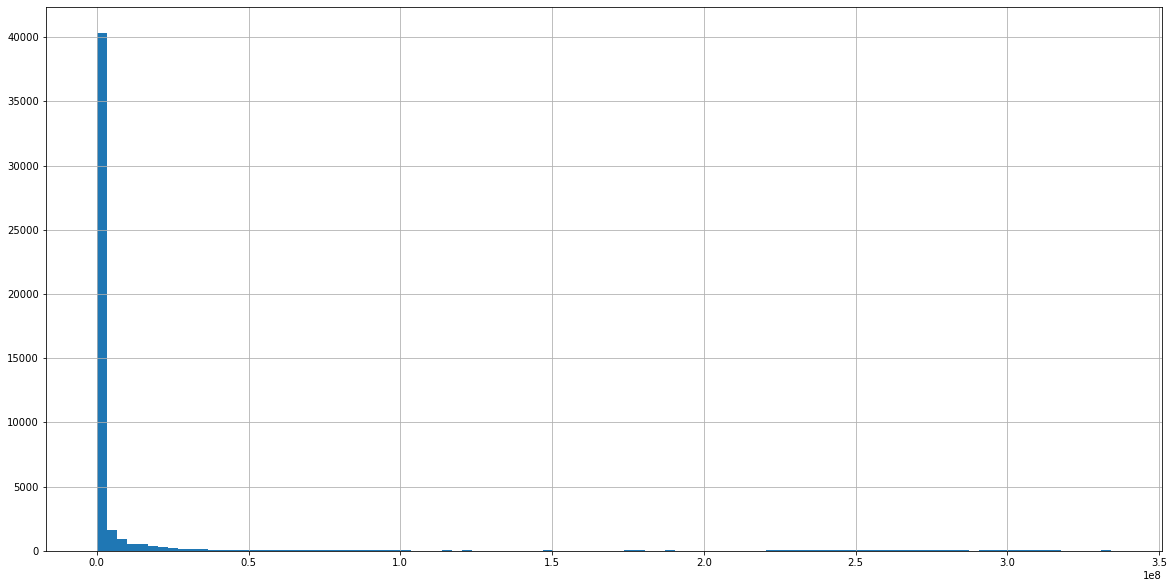

In [30]:
# Graficamos histograma de errores cuadrados.
se.hist(bins = 100, figsize=(20, 10))
print(se.describe())

### Hemos desarrollado un modelo con un desempeño aceptable para valuar el precio de distintas joyas.

